Ratio de costo de entrada al costo total (incluyendo Code Interpreter): 0.82

Costo medio de las interacciones: $0.21
Costo total de las interacciones: $2.06

Costo por token de entrada: $0.00000609
Costo por token de salida: $0.000439


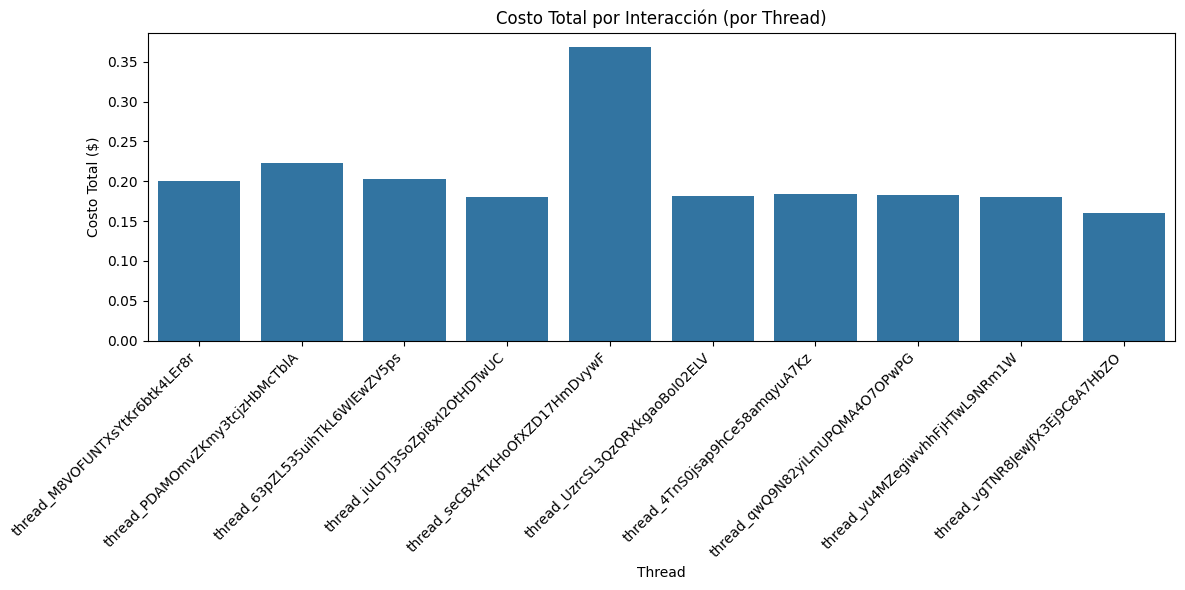

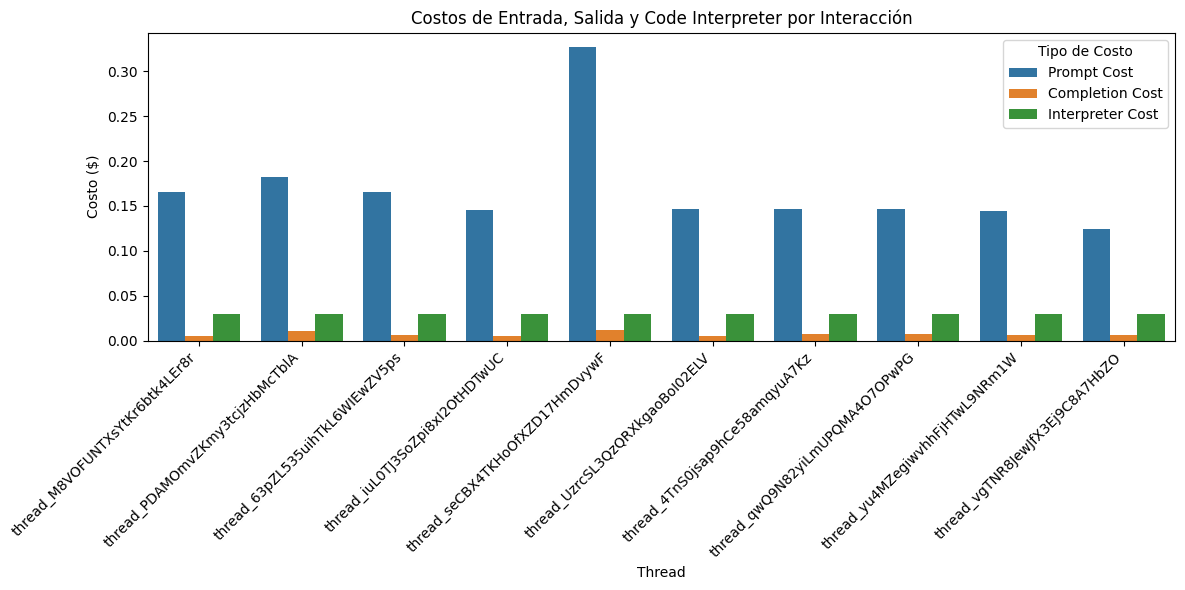

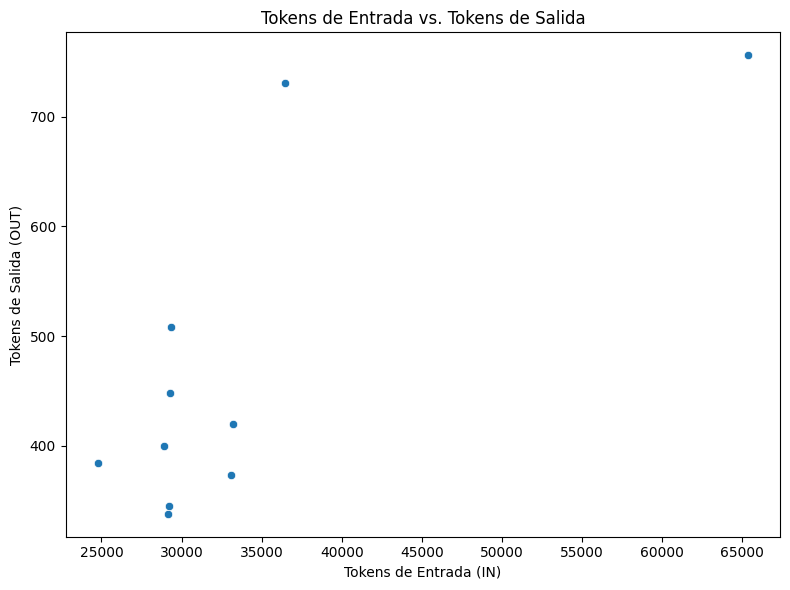

In [2]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos corregidos de las interacciones de la API GPT-4
data = {
    'Thread': [
        'thread_M8VOFUNTXsYtKr6btk4LEr8r',
        'thread_PDAMOmvZKmy3tcjzHbMcTblA',
        'thread_63pZL535uihTkL6WIEwZV5ps',
        'thread_iuL0TJ3SoZpi8xI2OtHDTwUC',
        'thread_seCBX4TKHoOfXZD17HmDvywF',
        'thread_UzrcSL3QzQRXkgaoBoI02ELV',
        'thread_4TnS0jsap9hCe58amqyuA7Kz',
        'thread_qwQ9N82yiLmUPQMA4O7OPwPG',
        'thread_yu4MZegiwvhhFjHTwL9NRm1W',
        'thread_vgTNR8JewJfX3Ej9C8A7HbZO'
    ],
    'IN': [33062, 36455, 33186, 29152, 65323, 29217, 29312, 29293, 28937, 24795],
    'OUT': [373, 731, 420, 338, 756, 345, 508, 448, 400, 384]
}

# Crear DataFrame a partir de los datos
df = pd.DataFrame(data)

# Precios por millón de tokens
PROMPT_COST_PER_1M_TOKENS = 5.00   # Precio por 1,000,000 tokens de entrada
COMPLETION_COST_PER_1M_TOKENS = 15.00  # Precio por 1,000,000 tokens de salida

# Calcular los costos
df['Prompt Cost'] = (df['IN'] / 1_000_000) * PROMPT_COST_PER_1M_TOKENS
df['Completion Cost'] = (df['OUT'] / 1_000_000) * COMPLETION_COST_PER_1M_TOKENS

# Precio del intérprete de código por sesión
interpreter_price = 0.03  # por sesión

# Agregar el costo del intérprete al DataFrame
df['Interpreter Cost'] = interpreter_price

# Calcular el costo total incluyendo el intérprete
df['Total Cost'] = df['Prompt Cost'] + df['Completion Cost'] + df['Interpreter Cost']

# Calcular costos totales
prompt_cost = df['Prompt Cost'].sum()
completion_cost = df['Completion Cost'].sum()
interpreter_cost = df['Interpreter Cost'].sum()
total_cost = df['Total Cost'].sum()

# Calcular el ratio de costo de entrada al costo total, incluyendo el intérprete
ratio = prompt_cost / total_cost
print(f'Ratio de costo de entrada al costo total (incluyendo Code Interpreter): {ratio:.2f}')

# Calcular el costo medio de las interacciones
mean_cost = df['Total Cost'].mean()
print(f'\nCosto medio de las interacciones: ${mean_cost:.2f}')

# Calcular el costo total de las interacciones
print(f'Costo total de las interacciones: ${total_cost:.2f}')

# Calcular costos por token de entrada y salida
total_input = df['IN'].sum()
cost_per_input_token = total_cost / total_input
print(f'\nCosto por token de entrada: ${cost_per_input_token:.8f}')

total_output = df['OUT'].sum()
cost_per_output_token = total_cost / total_output
print(f'Costo por token de salida: ${cost_per_output_token:.6f}')

# Graficar los costos totales por Thread
plt.figure(figsize=(12, 6))
sns.barplot(x='Thread', y='Total Cost', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Costo Total por Interacción (por Thread)')
plt.xlabel('Thread')
plt.ylabel('Costo Total ($)')
plt.tight_layout()
plt.show()

# Graficar costos de Prompt, Completion y Interpreter por Thread
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='Thread', value_vars=['Prompt Cost', 'Completion Cost', 'Interpreter Cost'], var_name='Cost Type', value_name='Cost')

sns.barplot(x='Thread', y='Cost', hue='Cost Type', data=df_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Costos de Entrada, Salida y Code Interpreter por Interacción')
plt.xlabel('Thread')
plt.ylabel('Costo ($)')
plt.legend(title='Tipo de Costo')
plt.tight_layout()
plt.show()

# Graficar distribución de tokens de entrada y salida
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IN', y='OUT', data=df)
plt.title('Tokens de Entrada vs. Tokens de Salida')
plt.xlabel('Tokens de Entrada (IN)')
plt.ylabel('Tokens de Salida (OUT)')
plt.tight_layout()
plt.show() 

In [3]:
# Se definen las variables
hours_per_week = 40
consultation_time = 20
weeks_per_month = 4

# Calcular el número de pacientes atendidos por mes
minutes_per_week = hours_per_week * 60
patients_per_week = minutes_per_week / consultation_time
patients_per_month = patients_per_week * weeks_per_month

# Promedio de tokens de entrada y salida por interacción (de los datos anteriores)
average_in_tokens = df['IN'].mean()
average_out_tokens = df['OUT'].mean()

# Calcular el total de tokens para el mes
total_in_tokens = average_in_tokens * patients_per_month
total_out_tokens = average_out_tokens * patients_per_month

# Calcular los costos
total_prompt_cost = (total_in_tokens / 1_000_000) * PROMPT_COST_PER_1M_TOKENS
total_completion_cost = (total_out_tokens / 1_000_000) * COMPLETION_COST_PER_1M_TOKENS

# Calcular el costo del intérprete de código
interpreter_cost_per_session = interpreter_price  # $0.03 por sesión
total_interpreter_cost = patients_per_month * interpreter_cost_per_session

# Calcular el costo total
total_cost = total_prompt_cost + total_completion_cost + total_interpreter_cost

# Imprimir los resultados
print(f"Total de pacientes por mes: {patients_per_month:.0f}")
print(f"Total de tokens de entrada por mes: {total_in_tokens:.0f}")
print(f"Total de tokens de salida por mes: {total_out_tokens:.0f}")
print(f"Costo total de tokens de entrada: ${total_prompt_cost:.2f}")
print(f"Costo total de tokens de salida: ${total_completion_cost:.2f}")
print(f"Costo total del intérprete de código: ${total_interpreter_cost:.2f}")
print(f"\nCosto total para el doctor por mes: ${total_cost:.2f}")

Total de pacientes por mes: 480
Total de tokens de entrada por mes: 16259136
Total de tokens de salida por mes: 225744
Costo total de tokens de entrada: $81.30
Costo total de tokens de salida: $3.39
Costo total del intérprete de código: $14.40

Costo total para el doctor por mes: $99.08
